In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime

from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer 
from scipy import stats

from psyfun import io, atlas, spikes, util
from psyfun.config import paths, cmaps

In [108]:
2400/60

40.0

In [103]:
df_sessions = pd.read_parquet(paths['sessions'])  # session info
df_sessions = io.add_postLSD_epochs(df_sessions)
df_units = pd.read_parquet(paths['units'])  # unit info
print(len(df_sessions))
df_sessions = df_sessions.dropna(subset=['task00_spontaneous_start', 'task01_spontaneous_start'])
print(len(df_sessions))
df_sessions

45
37


Control_recording  LSD_admin alf/probe00/pykilosort/spikes.times.npy  \
0               False     1095.0                                   False   
1               False     1065.0                                    True   
2               False     1073.0                                    True   
4               False     1173.0                                    True   
6               False     1100.0                                    True   
8               False     1063.0                                    True   
11              False     1068.0                                    True   
12              False     1065.0                                    True   
13              False     1121.0                                    True   
14              False     1073.0                                   False   
15              False     1146.0                                    True   
16              False     1100.0                                    True   
17              False     1077.0                                    True   
18              False     1071.0                                    True   
19              False     1105.0                                    True   
20              False     1076.0                                    True   
21              False     1094.0                                    True   
22              False     1184.0                                    True   
23              False     1047.0                                    True   
24              False     1240.0                                    True   
25              False     1447.0                                    True   
26              False     1111.0                                    True   
27              False     1068.0                                    True   
28              False     1054.0                                    True   
29               True     1346.0                                   False   
30              False     1121.0                                   False   
31               True     1012.0                                   False   
32              False     1011.0                                    None   
33               True     1044.0                                   False   
34               True     1236.0                                   False   
35               True     1145.0                                   False   
36              False     1050.0                                   False   
37               True     1009.0                                   False   
38              False     1022.0                                   False   
41               True     1084.0                                   False   
42               True     1009.0                                   False   
43               True     1017.0                                   False   

   alf/probe01/pykilosort/spikes.times.npy  \
0                                     True   
1                                     True   
2                                     None   
4                                     True   
6                                     True   
8                                     True   
11                                    True   
12                                    True   
13                                    True   
14                                    None   
15                                    True   
16                                    True   
17                                    True   
18                                    None   
19                                    True   
20                                    True   
21                                   False   
22                                    True   
23                                    None   
24                                    True   
25                                    True   
26                                    None   
27                                    True   
28         

In [110]:
times = range(0, 2401, 60)
for time in times:
    start_column = f'LSD{time}_start'
    stop_column = f'LSD{time}_stop'
    df_sessions[start_column] = df_sessions['LSD_admin'] + time
    df_sessions[stop_column] = df_sessions['LSD_admin'] + time + 60
df_sessions

Control_recording  LSD_admin alf/probe00/pykilosort/spikes.times.npy  \
0               False     1095.0                                   False   
1               False     1065.0                                    True   
2               False     1073.0                                    True   
4               False     1173.0                                    True   
6               False     1100.0                                    True   
8               False     1063.0                                    True   
11              False     1068.0                                    True   
12              False     1065.0                                    True   
13              False     1121.0                                    True   
14              False     1073.0                                   False   
15              False     1146.0                                    True   
16              False     1100.0                                    True   
17              False     1077.0                                    True   
18              False     1071.0                                    True   
19              False     1105.0                                    True   
20              False     1076.0                                    True   
21              False     1094.0                                    True   
22              False     1184.0                                    True   
23              False     1047.0                                    True   
24              False     1240.0                                    True   
25              False     1447.0                                    True   
26              False     1111.0                                    True   
27              False     1068.0                                    True   
28              False     1054.0                                    True   
29               True     1346.0                                   False   
30              False     1121.0                                   False   
31               True     1012.0                                   False   
32              False     1011.0                                    None   
33               True     1044.0                                   False   
34               True     1236.0                                   False   
35               True     1145.0                                   False   
36              False     1050.0                                   False   
37               True     1009.0                                   False   
38              False     1022.0                                   False   
41               True     1084.0                                   False   
42               True     1009.0                                   False   
43               True     1017.0                                   False   

   alf/probe01/pykilosort/spikes.times.npy  \
0                                     True   
1                                     True   
2                                     None   
4                                     True   
6                                     True   
8                                     True   
11                                    True   
12                                    True   
13                                    True   
14                                    None   
15                                    True   
16                                    True   
17                                    True   
18                                    None   
19                                    True   
20                                    True   
21                                   False   
22                                    True   
23                                    None   
24                                    True   
25                                    True   
26                                    None   
27                                    True   
28         

In [ ]:
# # # #to skip new recordings
# df_sessions['year'] = df_sessions['start_time'].apply(lambda x: datetime.fromisoformat(x).year)
# df_sessions = df_sessions.query('year < 2025')

In [113]:
# Get eids for sessions with both tasks
df_sessionquery = df_sessions.query('n_tasks >= 2')
eids = df_sessionquery['eid'].tolist()
print (len(df_sessions['eid']))
print (len(eids))

# Find good-quality units from those sessions
df_unitquery = df_units.query('eid in @eids and ks2_label == "good"')
# Load spike times for good units
uuids = df_unitquery['uuid']
df_spiketimes = io.load_units(paths['spikes'], uuids)
# Join spike times with unit info
df_spikes = df_unitquery.set_index('uuid').join(df_spiketimes).reset_index()

# Merge session info into spikes dataframe
df_spikes = pd.merge(df_spikes, df_sessionquery, on=['subject', 'eid', 'session_n'], how='left')
# Clean up columns
df_spikes = df_spikes[[col for col in df_spikes.columns if not col.endswith('_x') or col.endswith('_y')]]
df_spikes['region'] = df_spikes['region'].replace({'none':np.nan})

37
37


100%|██████████| 15081/15081 [00:03<00:00, 4461.33it/s]


In [ ]:
# Define epochs and sliding_windows to use later for categorical/continuous analysis
categorical_epochs = ['task00_spontaneous', 'LSD0', 'LSD600', 'LSD1200', 'task01_spontaneous']
sliding_window = []
times = range(0, 2401, 60)
for time in times:
    sliding_window.append(f'LSD{time}')

In [116]:
# Get spike counts for epochs of interest
dt = 1  # get spike counts in 1s bins

# for epoch in categorical_epochs:
for epoch in sliding_window:
    print(f"Getting spike counts for: {epoch}")
    df_spikes[f'{epoch}_counts'] = df_spikes.progress_apply(spikes._get_spike_counts, epoch=epoch, dt=dt, axis='columns')
    df_spikes[f'{epoch}_rate'] = df_spikes[f'{epoch}_counts'].apply(lambda x: (x / dt).mean())

Getting spike counts for: LSD0


  0%|          | 0/15081 [00:00<?, ?it/s]

100%|██████████| 15081/15081 [00:04<00:00, 3294.23it/s]


Getting spike counts for: LSD60


100%|██████████| 15081/15081 [00:04<00:00, 3361.95it/s]


Getting spike counts for: LSD120


100%|██████████| 15081/15081 [00:04<00:00, 3344.42it/s]


Getting spike counts for: LSD180


100%|██████████| 15081/15081 [00:04<00:00, 3375.81it/s]


Getting spike counts for: LSD240


100%|██████████| 15081/15081 [00:04<00:00, 3495.67it/s]


Getting spike counts for: LSD300


100%|██████████| 15081/15081 [00:04<00:00, 3456.96it/s]


Getting spike counts for: LSD360


100%|██████████| 15081/15081 [00:04<00:00, 3277.62it/s]


Getting spike counts for: LSD420


100%|██████████| 15081/15081 [00:04<00:00, 3337.92it/s]


Getting spike counts for: LSD480


100%|██████████| 15081/15081 [00:04<00:00, 3499.92it/s]


Getting spike counts for: LSD540


100%|██████████| 15081/15081 [00:04<00:00, 3454.03it/s]


Getting spike counts for: LSD600


100%|██████████| 15081/15081 [00:04<00:00, 3332.84it/s]


Getting spike counts for: LSD660


100%|██████████| 15081/15081 [00:04<00:00, 3115.35it/s]


Getting spike counts for: LSD720


100%|██████████| 15081/15081 [00:04<00:00, 3224.68it/s]


Getting spike counts for: LSD780


100%|██████████| 15081/15081 [00:04<00:00, 3055.75it/s]


Getting spike counts for: LSD840


100%|██████████| 15081/15081 [00:04<00:00, 3090.63it/s]


Getting spike counts for: LSD900


100%|██████████| 15081/15081 [00:04<00:00, 3213.38it/s]


Getting spike counts for: LSD960


100%|██████████| 15081/15081 [00:04<00:00, 3416.52it/s]


Getting spike counts for: LSD1020


100%|██████████| 15081/15081 [00:04<00:00, 3379.81it/s]


Getting spike counts for: LSD1080


100%|██████████| 15081/15081 [00:04<00:00, 3354.50it/s]


Getting spike counts for: LSD1140


100%|██████████| 15081/15081 [00:04<00:00, 3385.79it/s]


Getting spike counts for: LSD1200


100%|██████████| 15081/15081 [00:04<00:00, 3394.68it/s]


Getting spike counts for: LSD1260


100%|██████████| 15081/15081 [00:04<00:00, 3480.62it/s]


Getting spike counts for: LSD1320


100%|██████████| 15081/15081 [00:04<00:00, 3395.03it/s]


Getting spike counts for: LSD1380


100%|██████████| 15081/15081 [00:04<00:00, 3208.73it/s]


Getting spike counts for: LSD1440


100%|██████████| 15081/15081 [00:04<00:00, 3182.21it/s]


Getting spike counts for: LSD1500


100%|██████████| 15081/15081 [00:04<00:00, 3278.55it/s]


Getting spike counts for: LSD1560


100%|██████████| 15081/15081 [00:04<00:00, 3372.78it/s]


Getting spike counts for: LSD1620


100%|██████████| 15081/15081 [00:04<00:00, 3427.34it/s]


Getting spike counts for: LSD1680


100%|██████████| 15081/15081 [00:04<00:00, 3555.03it/s]


Getting spike counts for: LSD1740


100%|██████████| 15081/15081 [00:04<00:00, 3492.50it/s]


Getting spike counts for: LSD1800


100%|██████████| 15081/15081 [00:04<00:00, 3623.25it/s]


Getting spike counts for: LSD1860


100%|██████████| 15081/15081 [00:04<00:00, 3667.49it/s]


Getting spike counts for: LSD1920


100%|██████████| 15081/15081 [00:04<00:00, 3237.38it/s]


Getting spike counts for: LSD1980


100%|██████████| 15081/15081 [00:04<00:00, 3427.66it/s]


Getting spike counts for: LSD2040


100%|██████████| 15081/15081 [00:04<00:00, 3574.87it/s]


Getting spike counts for: LSD2100


100%|██████████| 15081/15081 [00:04<00:00, 3575.87it/s]


Getting spike counts for: LSD2160


100%|██████████| 15081/15081 [00:04<00:00, 3361.38it/s]


Getting spike counts for: LSD2220


100%|██████████| 15081/15081 [00:04<00:00, 3590.99it/s]


Getting spike counts for: LSD2280


100%|██████████| 15081/15081 [00:04<00:00, 3635.19it/s]


Getting spike counts for: LSD2340


100%|██████████| 15081/15081 [00:04<00:00, 3535.70it/s]


Getting spike counts for: LSD2400


100%|██████████| 15081/15081 [00:04<00:00, 3493.27it/s]


In [118]:
# Useful metadata for analysis downstream
columns_to_keep = ['subject', 'eid', 'session_n', 'region', 'Control_recording']

pca_results = []
for idx, session_spikes in df_spikes.groupby('eid'): #add 'region' or any other columns to use for the grouping
    session_data = {col: session_spikes[col].unique()[0] for col in columns_to_keep}
    # for epochs in categorical_epochs:
    for epoch in sliding_window:
        print (epoch)
        X = np.column_stack(session_spikes[f'{epoch}_counts']) # Puts all spikes into a features x samples matrix
        transformer = PowerTransformer(method='yeo-johnson', standardize=True) # Pre-processing step to satisfy gaussianity assumption in PCA
        X_rescaled = transformer.fit_transform(X) 
        pca = PCA()
        X_pcs = pca.fit_transform(X)
        session_data[f'{epoch}_eigenspectrum'] = pca.explained_variance_ratio_
        session_data[f'{epoch}_loadings'] = pca.components_
    pca_results.append(session_data)
df_pca = pd.DataFrame(pca_results)

LSD0
LSD60
LSD120
LSD180
LSD240
LSD300
LSD360
LSD420
LSD480
LSD540
LSD600
LSD660
LSD720
LSD780
LSD840
LSD900
LSD960
LSD1020
LSD1080
LSD1140
LSD1200
LSD1260
LSD1320
LSD1380
LSD1440
LSD1500
LSD1560
LSD1620
LSD1680
LSD1740
LSD1800
LSD1860
LSD1920
LSD1980
LSD2040
LSD2100
LSD2160
LSD2220
LSD2280
LSD2340
LSD2400
LSD0
LSD60
LSD120
LSD180
LSD240
LSD300
LSD360
LSD420
LSD480
LSD540
LSD600
LSD660
LSD720
LSD780
LSD840
LSD900
LSD960
LSD1020
LSD1080
LSD1140
LSD1200
LSD1260
LSD1320
LSD1380
LSD1440
LSD1500
LSD1560
LSD1620
LSD1680
LSD1740
LSD1800
LSD1860
LSD1920
LSD1980
LSD2040
LSD2100
LSD2160
LSD2220
LSD2280
LSD2340
LSD2400
LSD0
LSD60
LSD120
LSD180
LSD240
LSD300
LSD360
LSD420
LSD480
LSD540
LSD600
LSD660
LSD720
LSD780
LSD840
LSD900
LSD960
LSD1020
LSD1080
LSD1140
LSD1200
LSD1260
LSD1320
LSD1380
LSD1440
LSD1500
LSD1560
LSD1620
LSD1680
LSD1740
LSD1800
LSD1860
LSD1920
LSD1980
LSD2040
LSD2100
LSD2160
LSD2220
LSD2280
LSD2340
LSD2400
LSD0
LSD60
LSD120
LSD180
LSD240
LSD300
LSD360
LSD420
LSD480
LSD540
LSD600
LS

In [119]:
df_sessions

Control_recording  LSD_admin alf/probe00/pykilosort/spikes.times.npy  \
0               False     1095.0                                   False   
1               False     1065.0                                    True   
2               False     1073.0                                    True   
4               False     1173.0                                    True   
6               False     1100.0                                    True   
8               False     1063.0                                    True   
11              False     1068.0                                    True   
12              False     1065.0                                    True   
13              False     1121.0                                    True   
14              False     1073.0                                   False   
15              False     1146.0                                    True   
16              False     1100.0                                    True   
17              False     1077.0                                    True   
18              False     1071.0                                    True   
19              False     1105.0                                    True   
20              False     1076.0                                    True   
21              False     1094.0                                    True   
22              False     1184.0                                    True   
23              False     1047.0                                    True   
24              False     1240.0                                    True   
25              False     1447.0                                    True   
26              False     1111.0                                    True   
27              False     1068.0                                    True   
28              False     1054.0                                    True   
29               True     1346.0                                   False   
30              False     1121.0                                   False   
31               True     1012.0                                   False   
32              False     1011.0                                    None   
33               True     1044.0                                   False   
34               True     1236.0                                   False   
35               True     1145.0                                   False   
36              False     1050.0                                   False   
37               True     1009.0                                   False   
38              False     1022.0                                   False   
41               True     1084.0                                   False   
42               True     1009.0                                   False   
43               True     1017.0                                   False   

   alf/probe01/pykilosort/spikes.times.npy  \
0                                     True   
1                                     True   
2                                     None   
4                                     True   
6                                     True   
8                                     True   
11                                    True   
12                                    True   
13                                    True   
14                                    None   
15                                    True   
16                                    True   
17                                    True   
18                                    None   
19                                    True   
20                                    True   
21                                   False   
22                                    True   
23                                    None   
24                                    True   
25                                    True   
26                                    None   
27                                    True   
28         

In [120]:
for epoch in sliding_window:
    df_pca[f'{epoch}_pc1'] = df_pca[f'{epoch}_eigenspectrum'].apply(lambda x: x[0])
    df_pca[f'{epoch}_n80'] = df_pca[f'{epoch}_eigenspectrum'].apply(lambda x: np.cumsum(x).searchsorted(0.8))
    df_pca[f'{epoch}_powlaw'] = df_pca[f'{epoch}_eigenspectrum'].apply(util.power_law_slope)
    df_pca[f'{epoch}_ngsc'] = df_pca[f'{epoch}_eigenspectrum'].apply(util.ngsc)
    # Note: exponential/ bi-exponential fits often poorly characterize these eigenspectra
    # df_pca[f'{epoch}_tau'] = df_pca[f'{epoch}_eigenspectrum'].apply(_get_exp_tau)
    # df_pca[f'{epoch}_lifetime'] = df_pca[f'{epoch}_eigenspectrum'].apply(_get_biexp_mean_lifetime)

/tmp/ipykernel_2982836/1038831245.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pca[f'{epoch}_n80'] = df_pca[f'{epoch}_eigenspectrum'].apply(lambda x: np.cumsum(x).searchsorted(0.8))
/tmp/ipykernel_2982836/1038831245.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pca[f'{epoch}_powlaw'] = df_pca[f'{epoch}_eigenspectrum'].apply(util.power_law_slope)
/tmp/ipykernel_2982836/1038831245.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

In [121]:
df_pca['start_time'] = df_sessions ['start_time']
df_pca.columns

/tmp/ipykernel_2982836/3251364090.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pca['start_time'] = df_sessions ['start_time']


Index(['subject', 'eid', 'session_n', 'region', 'Control_recording',
       'LSD0_eigenspectrum', 'LSD0_loadings', 'LSD60_eigenspectrum',
       'LSD60_loadings', 'LSD120_eigenspectrum',
       ...
       'LSD2280_ngsc', 'LSD2340_pc1', 'LSD2340_n80', 'LSD2340_powlaw',
       'LSD2340_ngsc', 'LSD2400_pc1', 'LSD2400_n80', 'LSD2400_powlaw',
       'LSD2400_ngsc', 'start_time'],
      dtype='object', length=252)

KeyError: 'task00_spontaneous_pc1'

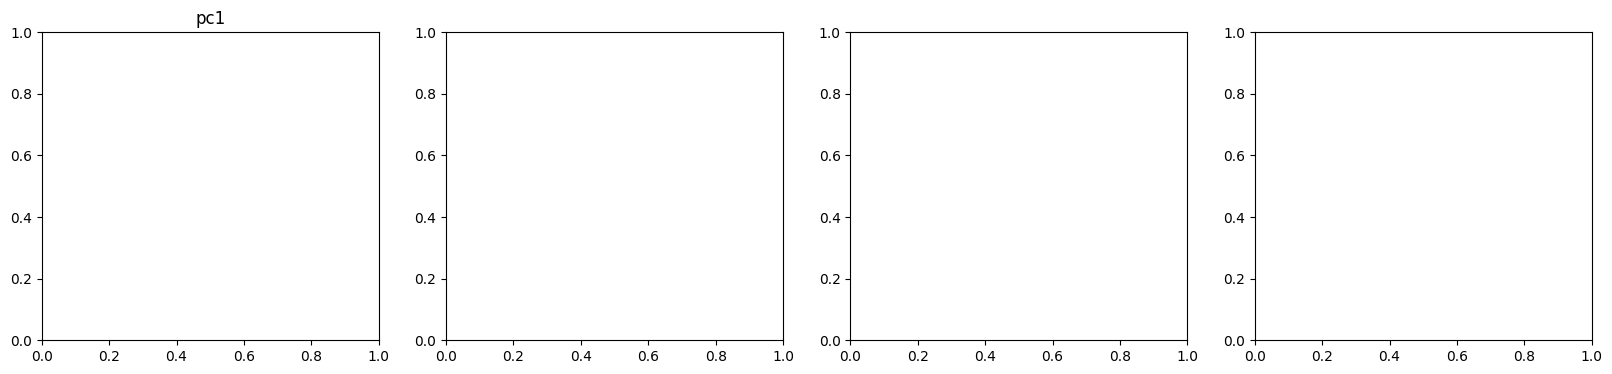

In [124]:

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

def plot_scatter(df_pca, separate_experimenters = False):
    # Create a function to map conditions to colors
    def create_color(row):
        if row['Control_recording']:
            return 'r'
        elif separate_experimenters and pd.to_datetime(row['start_time']).year == 2025:
            return 'g'
        return 'b'

    df_pca['color'] = df_pca.apply(create_color, axis=1)

    for val in ['pc1', 'n80', 'powlaw', 'ngsc']:
        fig, axs = plt.subplots(1, 4, figsize=(20, 4)) 
        for idx, task in enumerate(['LSD0', 'LSD600', 'LSD1200', 'task01_spontaneous']):
            ax = axs[idx]
            ax.set_title(val)

            xx = df_pca[f'task00_spontaneous_{val}']
            yy = df_pca[f'{task}_{val}']
            colors = df_pca['color']

            ax.scatter(xx, yy, s=20, c=colors, edgecolor='none', alpha=0.5)
            data_range = (min(xx.min(), yy.min()), max(xx.max(), yy.max()))
            ax.plot(data_range, data_range, ls='--', color='gray')

            ax.set_xlabel('task00_spontaneous')
            ax.set_ylabel(f'{task}')

            w, p = stats.wilcoxon(xx, yy)
            ax.text(0.6, 0.05, f'p={p:.2e}', transform=ax.transAxes)

        plt.show()
plot_scatter(df_pca, separate_experimenters = True)

/home/openlab/anaconda3/envs/iblenv/lib/python3.10/site-packages/scipy/stats/_wilcoxon.py:172: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se


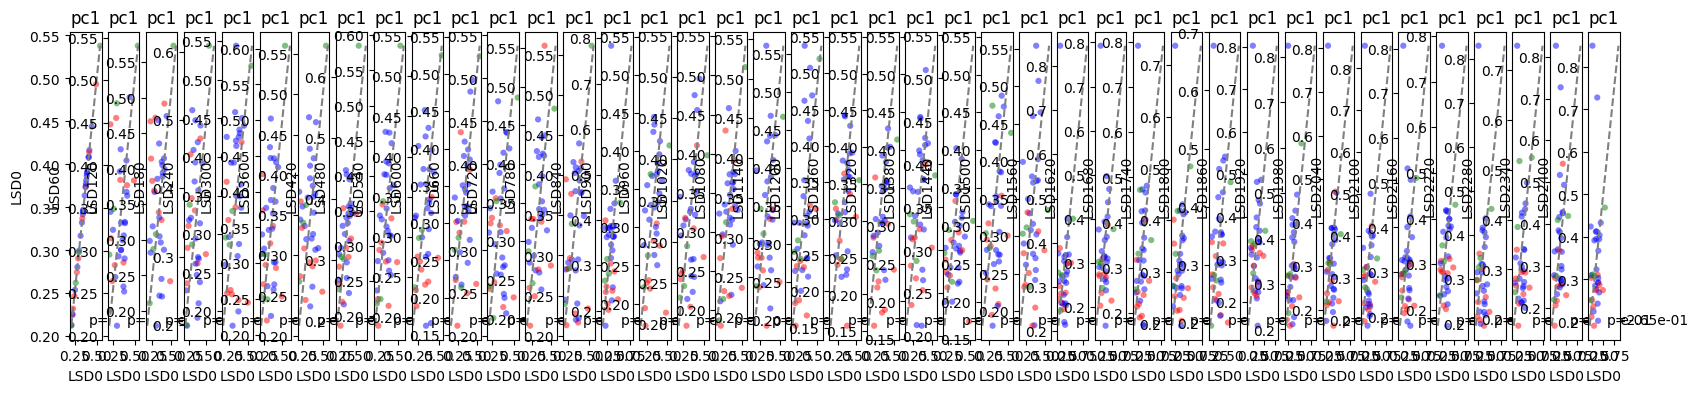

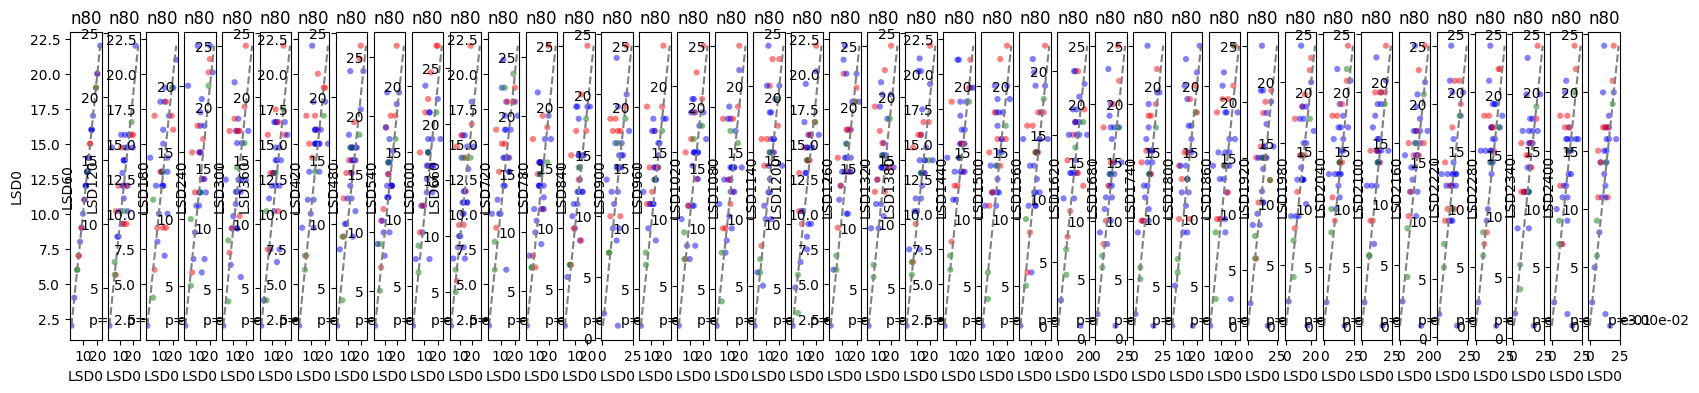

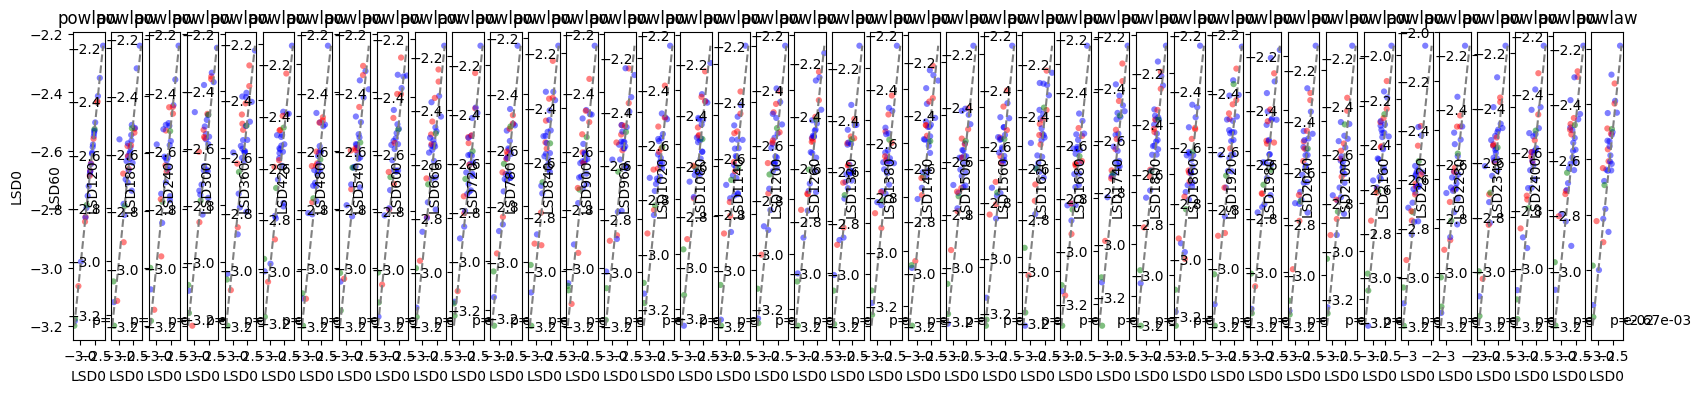

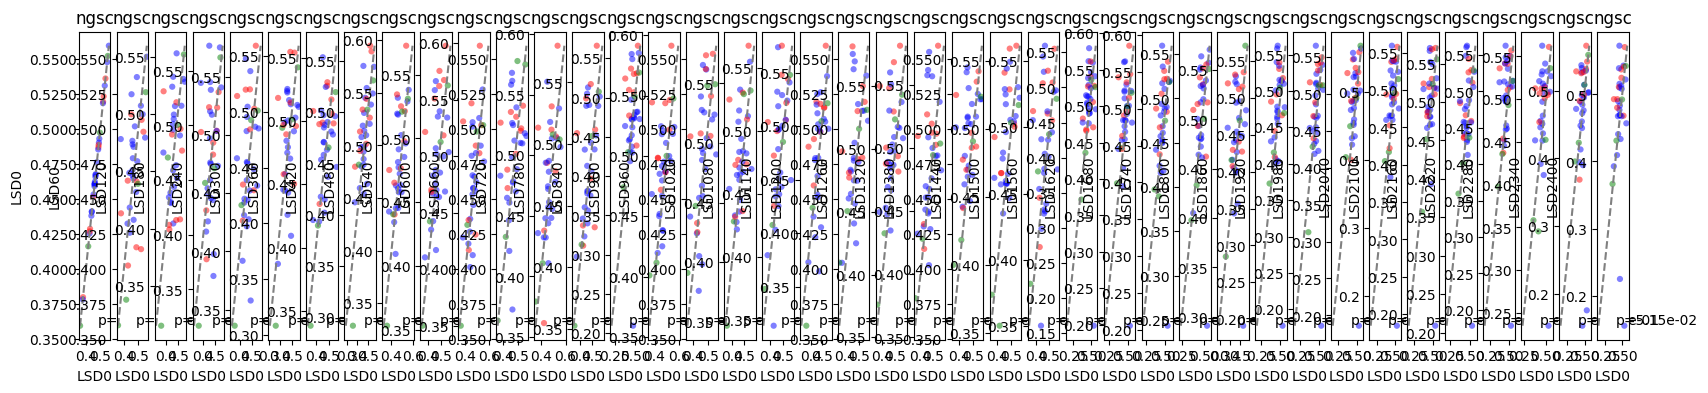

In [126]:

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

def plot_scatter(df_pca, separate_experimenters = False):
    # Create a function to map conditions to colors
    def create_color(row):
        if row['Control_recording']:
            return 'r'
        elif separate_experimenters and pd.to_datetime(row['start_time']).year == 2025:
            return 'g'
        return 'b'

    df_pca['color'] = df_pca.apply(create_color, axis=1)

    for val in ['pc1', 'n80', 'powlaw', 'ngsc']:
        epochs = sliding_window
        # epochs = categorical_epochs
        fig, axs = plt.subplots(1, len(epochs), figsize=(20, 4)) 
        for idx, epoch in enumerate(epochs):
            ax = axs[idx]
            ax.set_title(val)

            xx = df_pca[epochs[0] + '_' + val]
            yy = df_pca[f'{epoch}_{val}']
            colors = df_pca['color']

            ax.scatter(xx, yy, s=20, c=colors, edgecolor='none', alpha=0.5)
            data_range = (min(xx.min(), yy.min()), max(xx.max(), yy.max()))
            ax.plot(data_range, data_range, ls='--', color='gray')

            ax.set_xlabel(epochs[0])
            ax.set_ylabel(f'{epoch}')

            w, p = stats.wilcoxon(xx, yy)
            ax.text(0.6, 0.05, f'p={p:.2e}', transform=ax.transAxes)

        plt.show()
plot_scatter(df_pca, separate_experimenters = True)

KeyError: 'session'

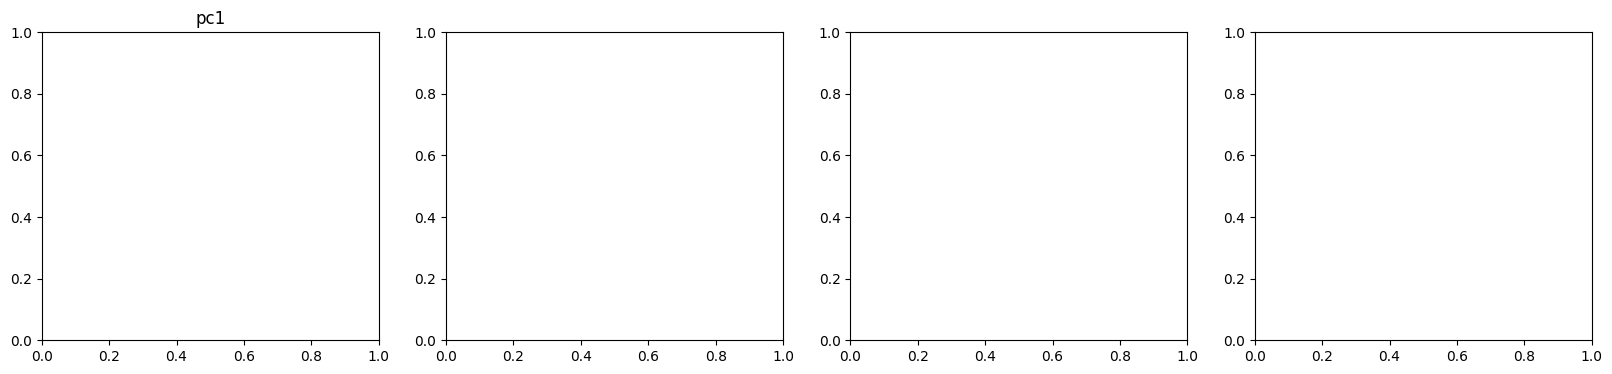

In [127]:
def plot_scatter(df_pca, separate_experimenters = False):
    # Create a function to map conditions to colors
    def create_color(row):
        if row['Control_recording']:
            return 'r'
        elif separate_experimenters and pd.to_datetime(row['start_time']).year == 2025:
            return 'g'
        return 'b'
    
    df_pca['color'] = df_pca.apply(create_color, axis=1)

    measures = ['pc1', 'n80', 'powlaw', 'ngsc']
    fig, axs = plt.subplots(1, len(measures), figsize=(20, 4)) 

    for idx, measure in enumerate(measures):

        ax = axs[idx]
        ax.set_title(measure)

        for _, session in df_pca.groupby(['session']):
          epochs_x = range(len(session))
          epochs_y = session[f'{measure}'].values
          color = session['color'].iloc[0]

          ax.plot(epochs_x, epochs_y, c=color, alpha=0.5)

        ax.set_xlabel('Epoch')
        ax.set_ylabel(measure)

        # if you still want to perform a statistical test and print its result
        # it will need to be adjusted to the new plot structure

    plt.show()

plot_scatter(df_pca, separate_experimenters = True)

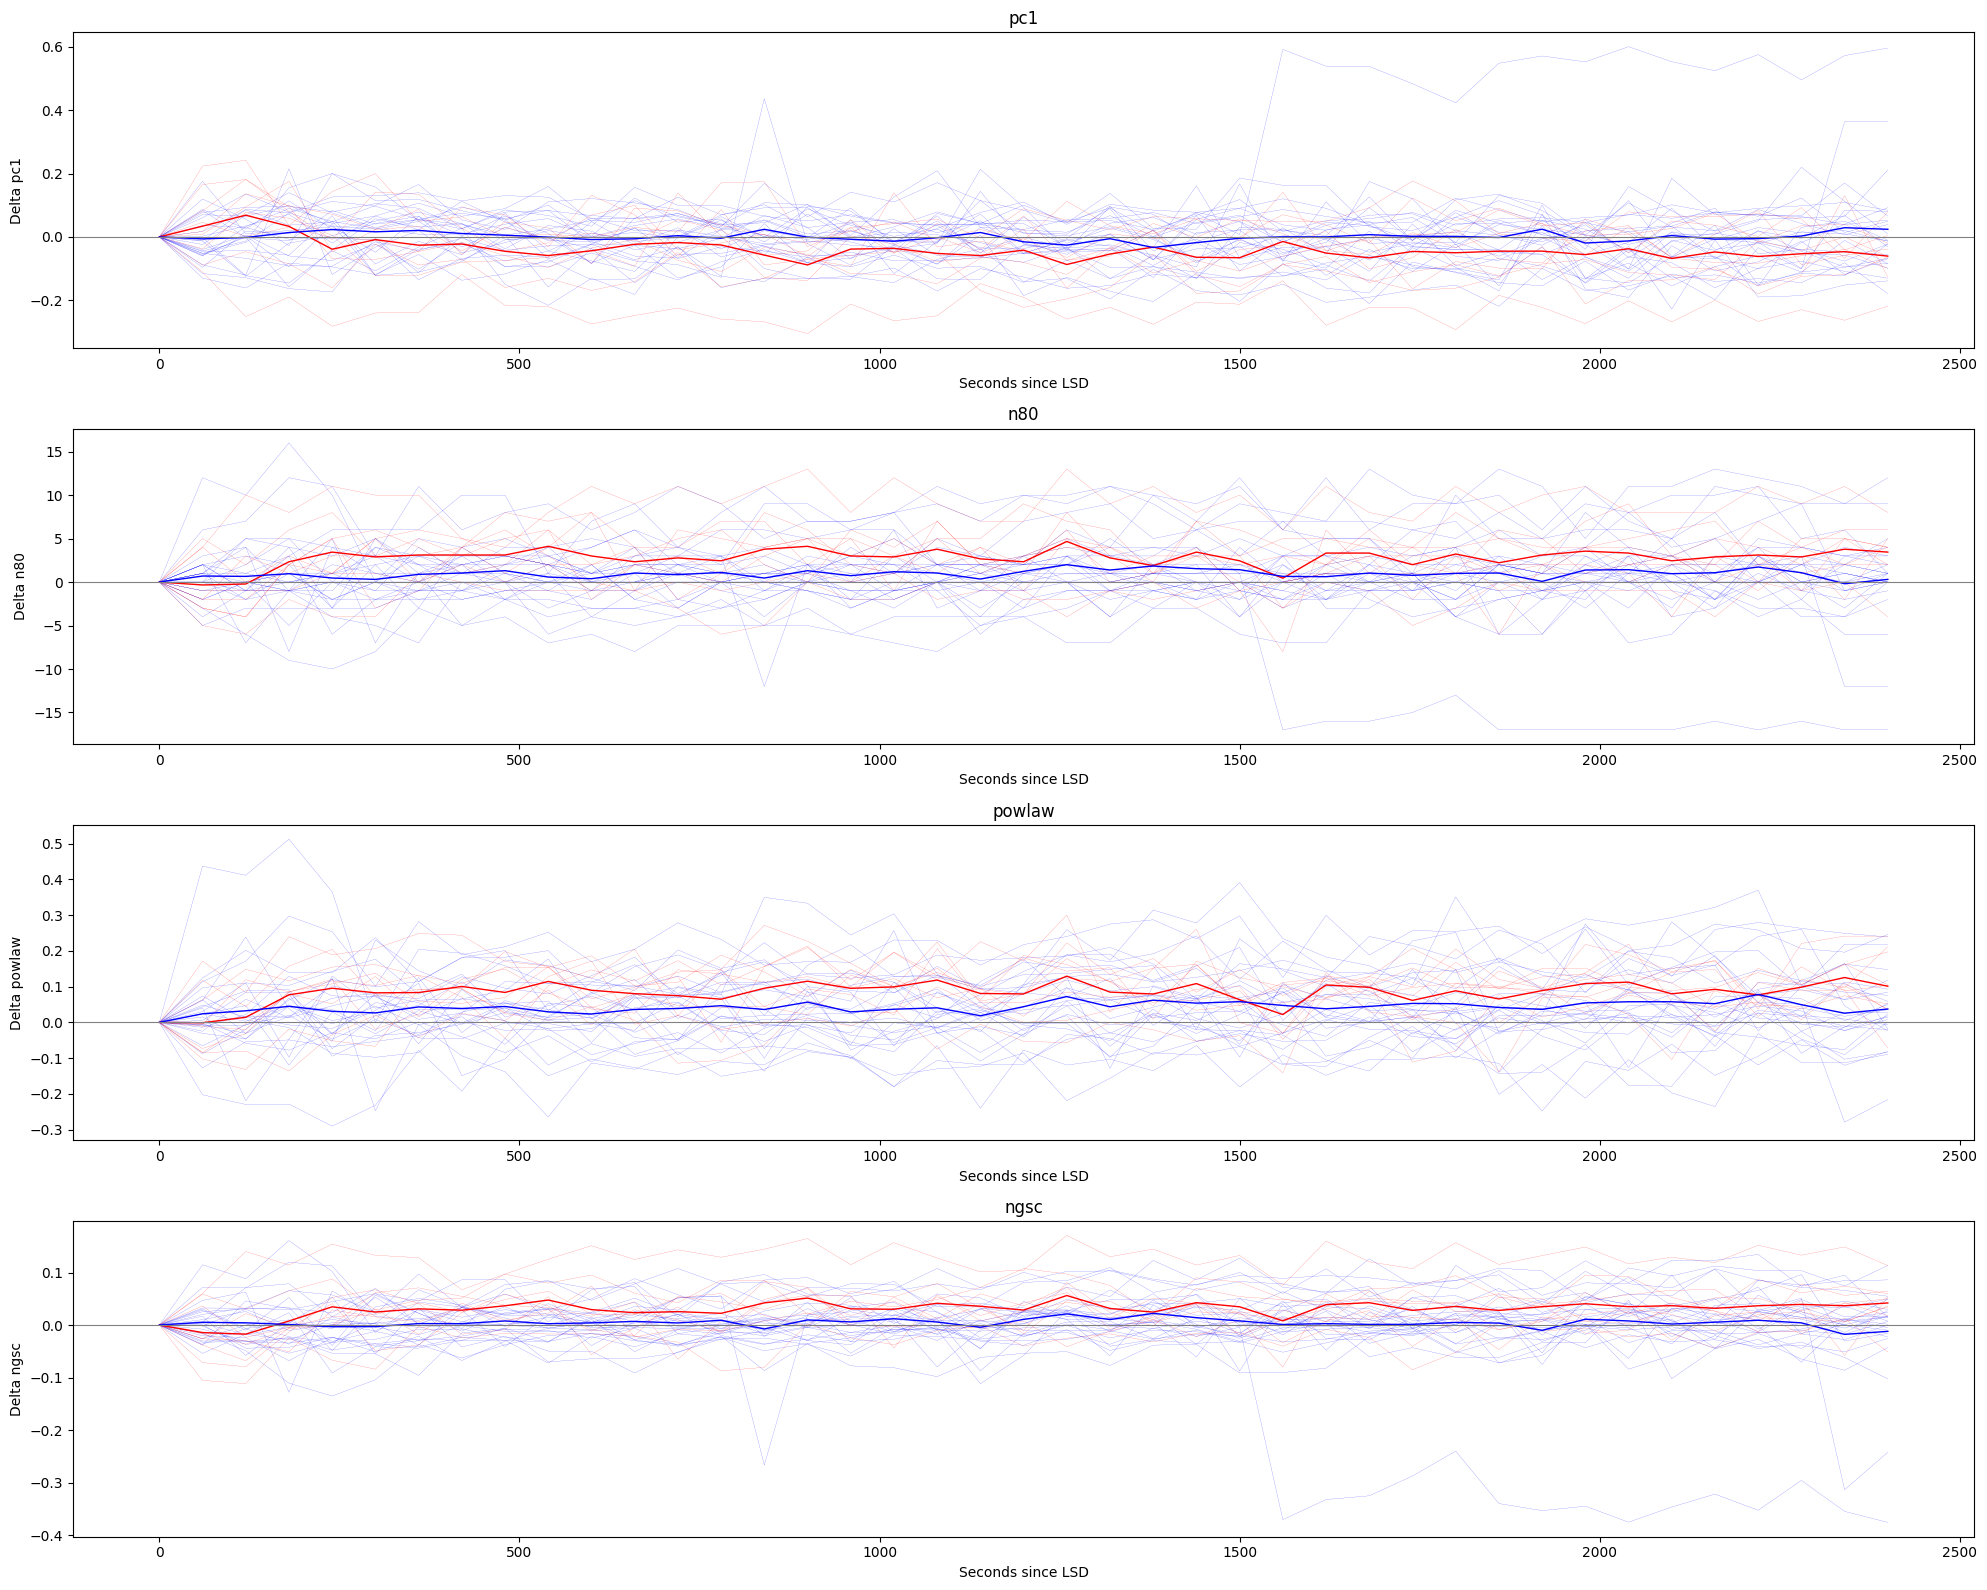

In [174]:
def plot_lines(df_pca, separate_experimenters = False, average_lines = True):
    def create_color(row):
        if row['Control_recording']:
            return 'r'
        elif separate_experimenters and pd.to_datetime(row['start_time']).year == 2025:
            return 'g'
        return 'b'
    linewidth_average = 1
    linewidth_session = 0.1
    if average_lines == False:
        linewidth_average = 0
        linewidth_session = 0.2
    df_pca['color'] = df_pca.apply(create_color, axis=1)
    measures = ['pc1', 'n80', 'powlaw', 'ngsc']
    fig, axs = plt.subplots(len(measures), 1, figsize=(20, 4*len(measures))) 

    for idx, measure in enumerate(measures):
        ax = axs[idx]
        ax.set_title(measure)

        red_values = []
        blue_values = []
        green_values = []

        for idx, row in df_pca.iterrows():
            epochs = [int(col.split('_')[0].replace('LSD', '')) for col in df_pca.columns if f'_{measure}' in col]
            values = pd.DataFrame([row[col] for col in df_pca.columns if f'_{measure}' in col])
            delta_values = values - values.iloc[0]
            color = row['color']

            ax.plot(epochs, delta_values, c=color, alpha=1, linewidth=linewidth_session)

            # Store values per color
            if color == 'r':
                red_values.append(delta_values)
            elif color == 'b':
                blue_values.append(delta_values)
            elif color == 'g':
                green_values.append(delta_values)

        # Note: Calculation of mean corrected here
        if red_values:
            ax.plot(epochs, pd.concat(red_values, axis=1).mean(axis=1), color='red', linewidth=linewidth_average)
        if blue_values:
            ax.plot(epochs, pd.concat(blue_values, axis=1).mean(axis=1), color='blue', linewidth=linewidth_average)
        if green_values and separate_experimenters:
            ax.plot(epochs, pd.concat(green_values, axis=1).mean(axis=1), color='green', linewidth=linewidth_average)

        ax.set_xlabel('Seconds since LSD')
        ax.set_ylabel(f'Delta {measure}')
        ax.axhline(0, color='gray', linewidth=0.8) 

    plt.tight_layout()
    plt.show()

plot_lines(df_pca, separate_experimenters = False, average_lines = True)

len(red_values):  9
len(blue_values):  26
len(green_values):  0
epoch p_value red_max blue_max
0 0.0018443548275076753 0.18194919405105525 0.11825960885429643
60 1.119404518695902e-13 0.2418697545633331 0.039574559345129434
120 2.868924753659763e-29 0.0 0.09790792786635266
180 0.648995752522375 0.0 0.0
240 0.0005442658553242751 0.1811106099879108 0.030443748632487166
300 5.467609064899583e-10 0.17525266238489928 0.21118540818148293
360 1.31021932134699e-07 0.14093887399953686 0.05300520883762416
420 6.831057033744552e-10 0.0460723812291457 0.11516624155707567
480 0.5736175380863748 0.13875336882801026 0.07241292289707962
len(red_values):  9
len(blue_values):  26
len(green_values):  0
epoch p_value red_max blue_max
0 0.23069446107585545 6 4
60 5.856032454329693e-14 1 5
120 2.057203668752196e-30 13 4
180 4.270308816175387e-06 9 13
240 0.13289772149279222 7 5
300 1.079303850547518e-17 6 2
360 0.00015363513855656163 8 5
420 4.0413147605139e-16 8 0
480 1.170049526068231e-07 8 16
len(red_val

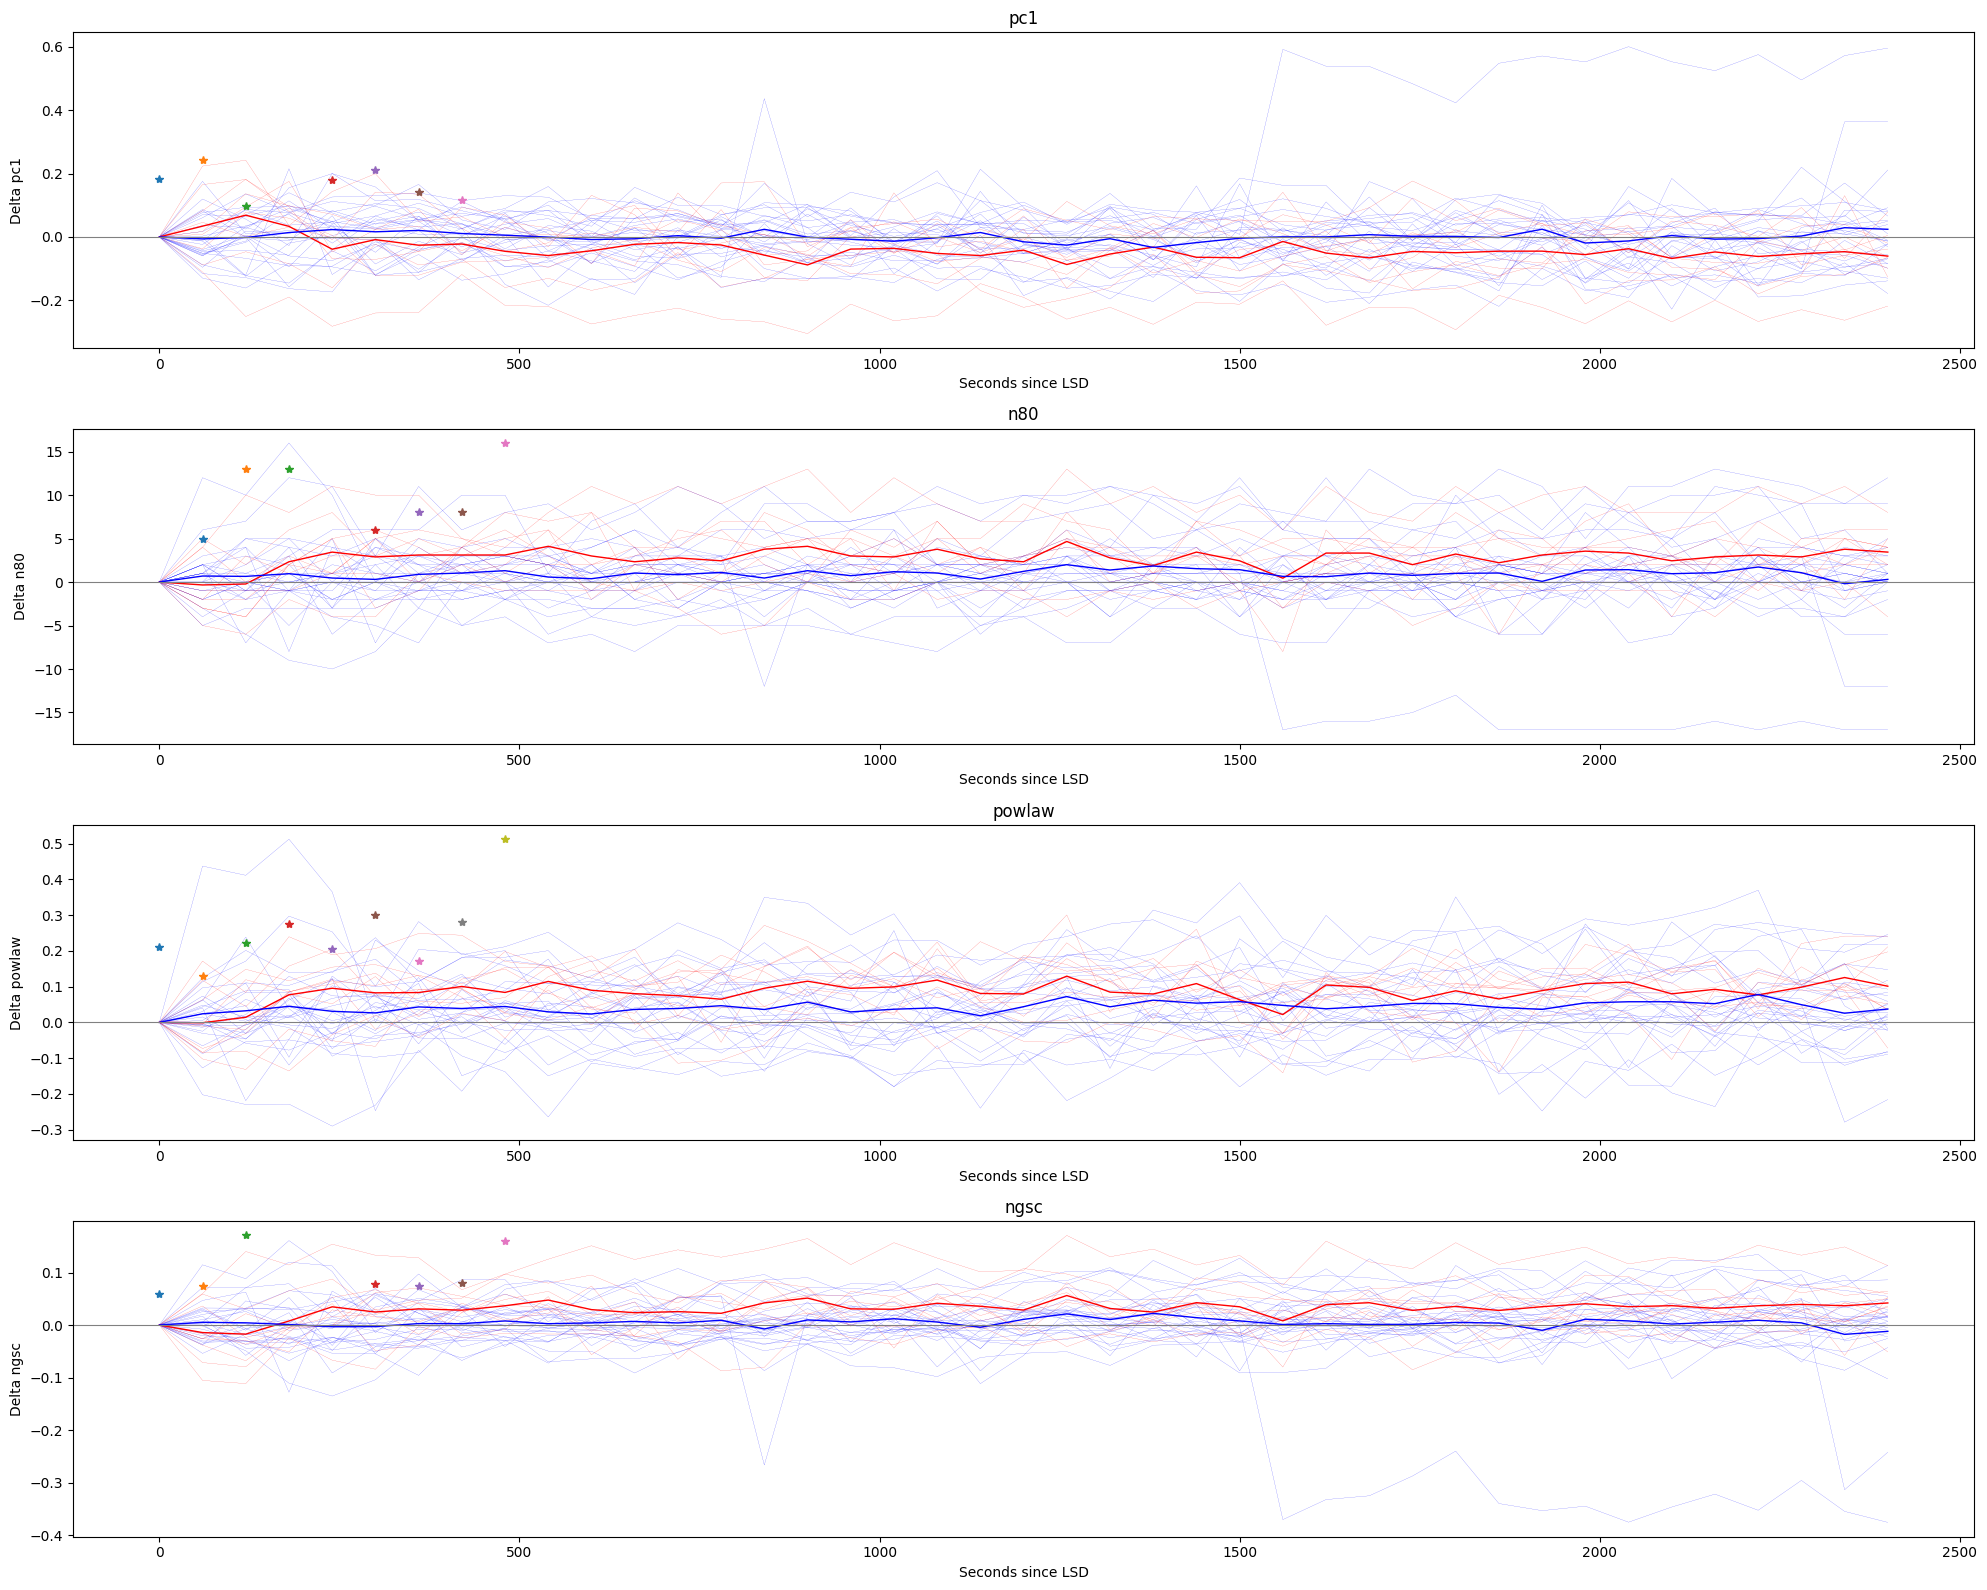

In [ ]:
from scipy.stats import ttest_ind

def plot_lines(df_pca, separate_experimenters = False, average_lines = True):
    # Create a function to map conditions to colors
    def create_color(row):
        if row['Control_recording']:
            return 'r'
        elif separate_experimenters and pd.to_datetime(row['start_time']).year == 2025:
            return 'g'
        return 'b'
    linewidth_average = 1
    linewidth_session = 0.1
    if average_lines == False:
        linewidth_average = 0
        linewidth_session = 0.2

    df_pca['color'] = df_pca.apply(create_color, axis=1)
    measures = ['pc1', 'n80', 'powlaw', 'ngsc']

    fig, axs = plt.subplots(len(measures), 1, figsize=(20, 4*len(measures))) 

    for idx, measure in enumerate(measures):
        ax = axs[idx]
        ax.set_title(measure)

        red_values = []
        blue_values = []
        green_values = []

        for idx, row in df_pca.iterrows():
            epochs = [int(col.split('_')[0].replace('LSD', '')) for col in df_pca.columns if f'_{measure}' in col]
            values = pd.DataFrame([row[col] for col in df_pca.columns if f'_{measure}' in col])
            delta_values = values - values.iloc[0]
            color = row['color']

            ax.plot(epochs, delta_values, c=color, alpha=1, linewidth=linewidth_session)

            # Store values per color
            if color == 'r':
                red_values.append(delta_values)
            elif color == 'b':
                blue_values.append(delta_values)
            elif color == 'g':
                green_values.append(delta_values)

        # Calculate and test significance
        if average_lines == True:
            # Change from list of DataFrames to 2D array
            red_values_array = pd.concat(red_values, axis = 1).values
            blue_values_array = pd.concat(blue_values, axis = 1).values

            # Calculate t-test for each epoch
            p_values = []
            for i in range(red_values_array.shape[1]):
                p_value = ttest_ind(red_values_array[:,i], blue_values_array[:,i], nan_policy='omit').pvalue
                p_values.append(p_value)

            # Add asterisks for significant values
            print('epoch', 'p_value', 'red_max', 'blue_max')
            for i in range(red_values_array.shape[1]):
                red_max = np.nanmax(red_values_array[:,i])
                blue_max = np.nanmax(blue_values_array[:,i])
                print(epochs[i], p_values[i], red_max, blue_max)
                if p_values[i] < 0.05:
                    y_value = np.maximum(red_max, blue_max)    
                    ax.plot(epochs[i], y_value, '*') 
                    
        # Note: Calculation of mean corrected here
        if red_values:
            ax.plot(epochs, pd.concat(red_values, axis=1).mean(axis=1), color='red', linewidth=linewidth_average)
        if blue_values:
            ax.plot(epochs, pd.concat(blue_values, axis=1).mean(axis=1), color='blue', linewidth=linewidth_average)
        if green_values and separate_experimenters:
            ax.plot(epochs, pd.concat(green_values, axis=1).mean(axis=1), color='green', linewidth=linewidth_average)

        ax.set_xlabel('Seconds since LSD')
        ax.set_ylabel(f'Delta {measure}')
        ax.axhline(0, color='gray', linewidth=0.8) 

    plt.tight_layout()
    plt.show()

plot_lines(df_pca, separate_experimenters = False, average_lines = True)

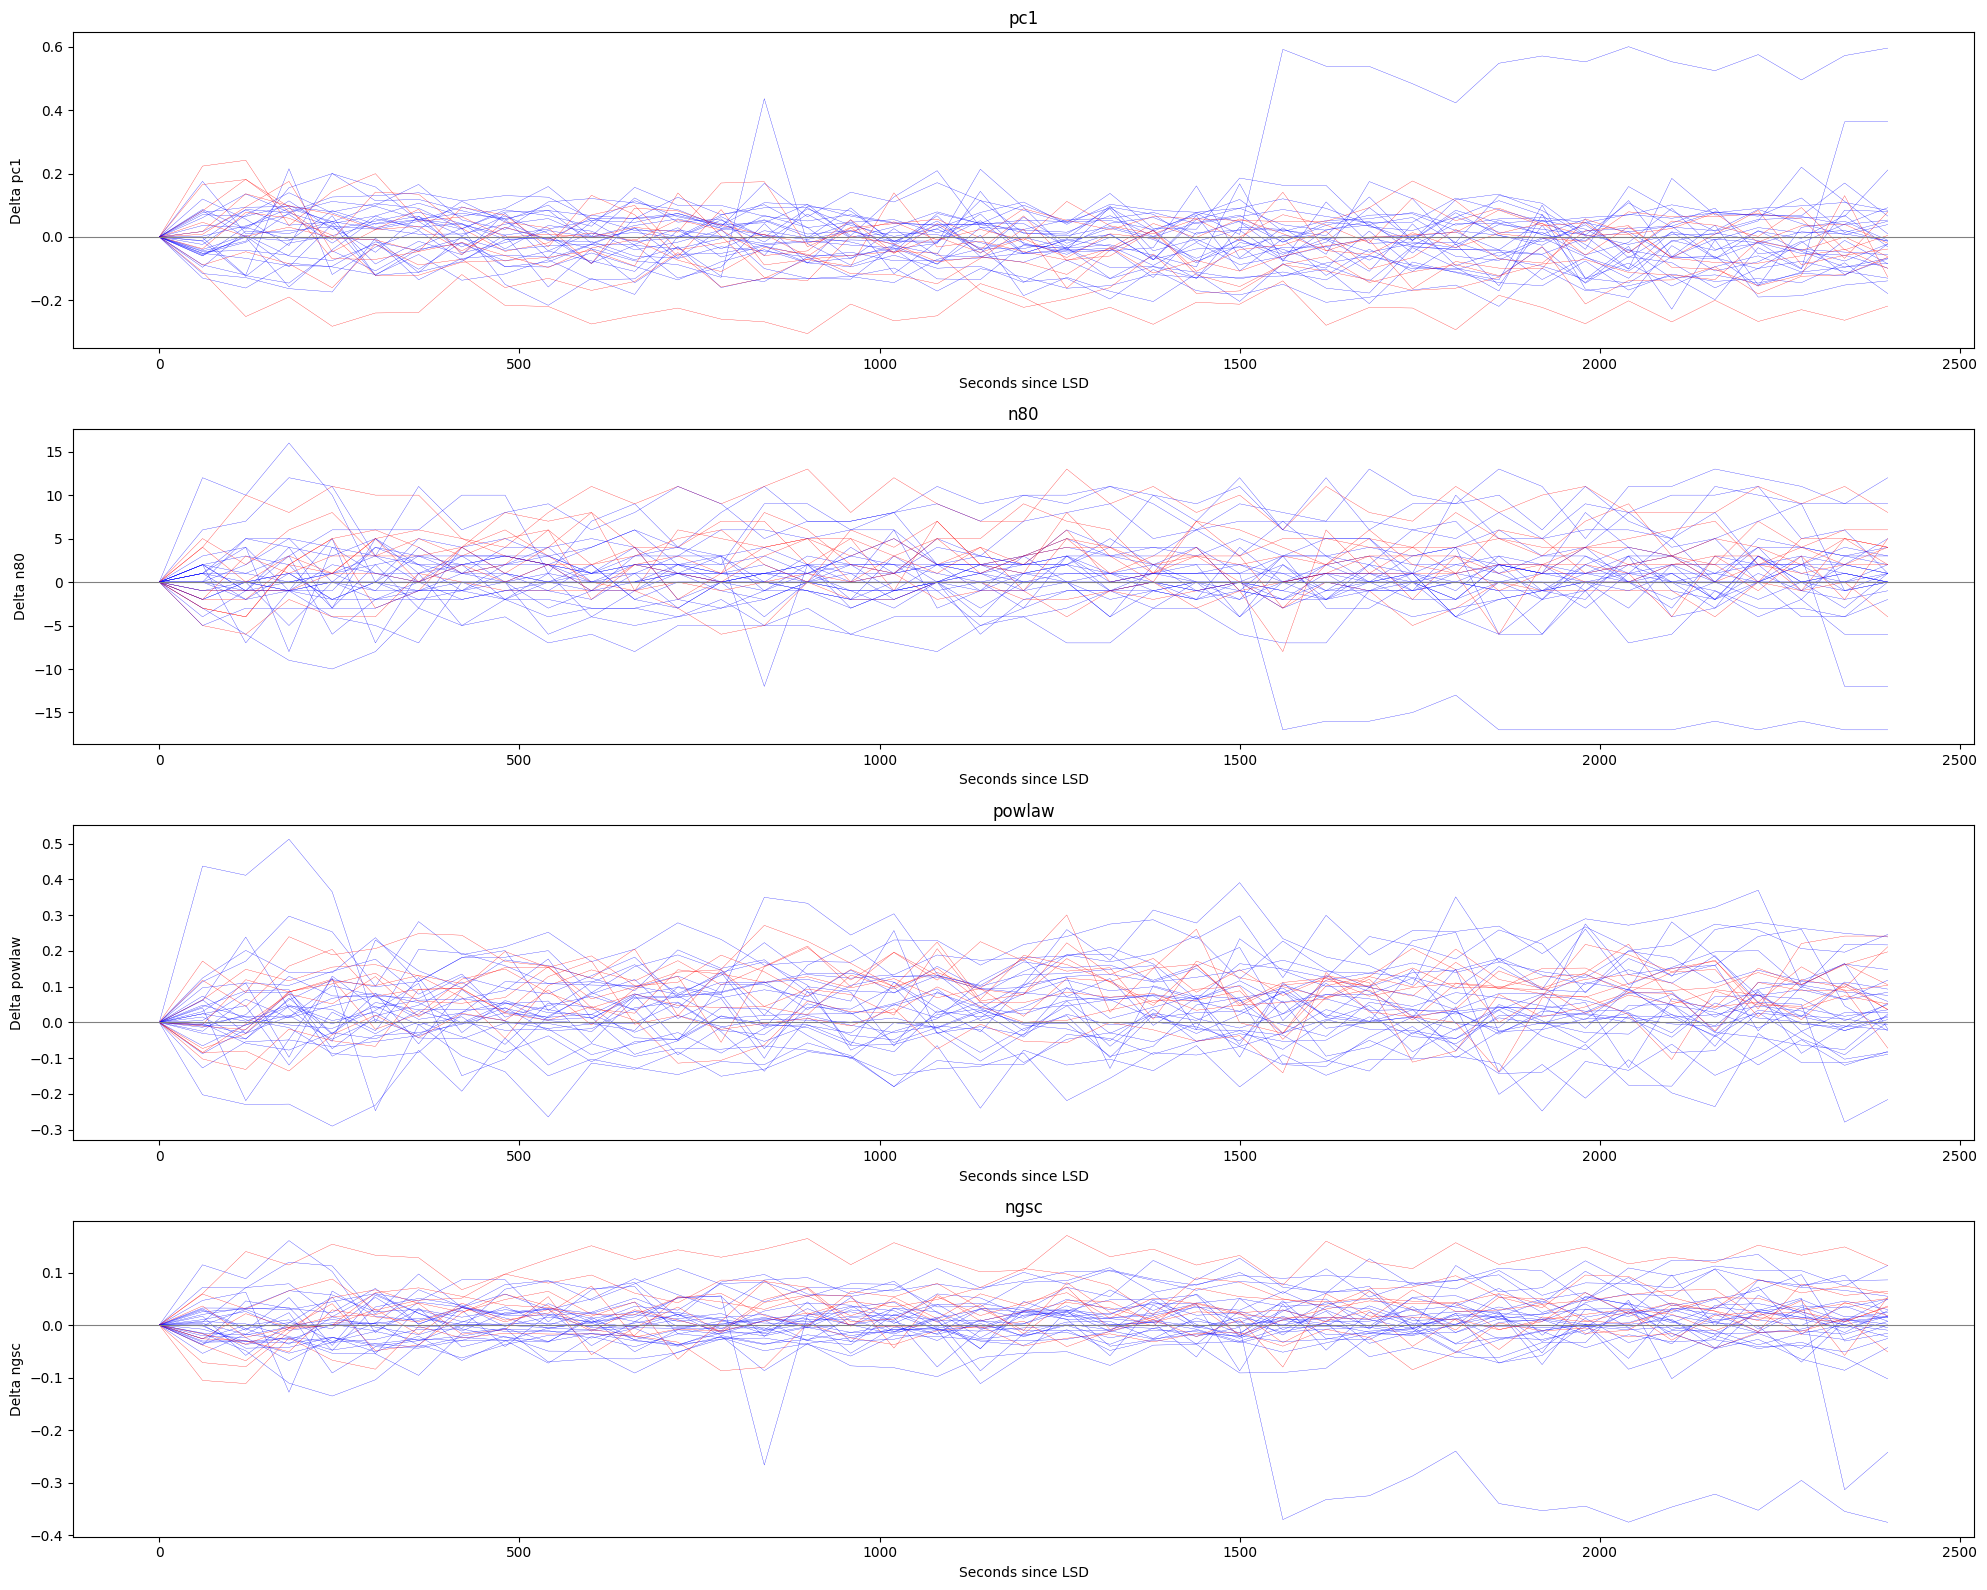

In [ ]:
def plot_lines(df_pca, separate_experimenters=False):
    # Create a function to map conditions to colors
    def create_color(row):
        if row['Control_recording']:
            return 'r'
        elif separate_experimenters and pd.to_datetime(row['start_time']).year == 2025:
            return 'g'
        return 'b'
    
    df_pca['color'] = df_pca.apply(create_color, axis=1)

    measures = ['pc1', 'n80', 'powlaw', 'ngsc']
    fig, axs = plt.subplots(len(measures), 1, figsize=(20, 4*len(measures))) 

    for idx, measure in enumerate(measures):
        ax = axs[idx]
        ax.set_title(measure)

        for idx, row in df_pca.iterrows():
            epochs = [int(col.split('_')[0].replace('LSD', '')) for col in df_pca.columns if f'_{measure}' in col]
            values = pd.DataFrame([row[col] for col in df_pca.columns if f'_{measure}' in col])
            delta_values = values - values.iloc[0]
            color = row['color']

            ax.plot(epochs, delta_values, c=color, alpha=1, linewidth=0.2)

        ax.set_xlabel('Seconds since LSD')
        ax.set_ylabel(f'Delta {measure}')
        ax.axhline(0, color='gray', linewidth=0.8)  # Adds a horizontal line at y=0

    plt.tight_layout()
    plt.show()

plot_lines(df_pca, separate_experimenters = False)

In [94]:
def angle(v1, v2):
    """
    Compute the angle between two vectors v1 and v2.
    
    Parameters
    ----------
    v1, v2 : array_like
        The two vectors (e.g. PC1 directions) between which to compute the angle.
    
    Returns
    -------
    angle_rad : float
        Angle in radians.
    angle_deg : float
        Angle in degrees.
    """
    # Compute dot product and norms.
    dot = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    
    # Avoid numerical issues: clip the cosine value to the valid range [-1, 1]
    cos_theta = np.clip(dot / (norm_v1 * norm_v2), -1.0, 1.0)
    angle_rad = np.arccos(cos_theta)
    # angle_deg = np.degrees(angle_rad)
    return angle_rad

In [72]:
df_pca

subject                                   eid  session_n region  \
0   ZFM-06187  0bd26d4d-c1c1-4f59-af13-59d19b597ab6          2    TTd   
1   ZFM-06048  1cbb24d0-2188-45dc-a116-e23a089c62b4          1     CP   
2   ZFM-05496  2583567d-cd2a-485a-8d79-85aa619e1ce2          2    TTd   
3   ZFM-08458  3e9d9490-7fb2-4aa3-b8cd-83f216ad8cde          1   None   
4   ZFM-06296  4b398979-c54c-498f-a3d4-b201c2285be5          1  COApm   
5   ZFM-08584  4e3f021c-e553-4c67-988a-0ca52535748e          2   None   
6   ZFM-06301  50322fbb-5b93-46d7-9ca0-391fa30c966a          1     TH   
7   ZFM-06047  53d8cb2f-3338-4bcd-81c4-6207b660eba3          1     CP   
8   ZFM-08458  55f3644c-3f86-423e-9beb-6604b5aa4e2c          2   None   
9   ZFM-08631  58c61f29-d4e6-4ca7-b6de-bd860e83fe4e          2   None   
10  SQL-15020  58ca39c5-e27f-43c4-8516-2ccc4fe88042          1   None   
11  ZFM-08584  5c28961e-1183-43f9-86a8-9c1c9d8ed743          3   None   
12  ZFM-06373  6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde          2   BLAa   
13  SQL-15020  7149e0fc-a52d-4e93-849c-edc22d54e7a5          2   MEPO   
14  ZFM-06048  731a5f76-c4d6-4485-8584-7adeecdd6f3a          3   TEa1   
15  ZFM-06301  76bae405-b169-44ba-95db-b39342f21cf0          2   BMAa   
16  ZFM-06048  8057374c-baf2-4391-b290-e88743d8981a          2     DP   
17  ZFM-06301  86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a          3  ENTl3   
18  ZFM-08457  878b86b7-9245-40a3-843e-9ebf0a8251db          3   None   
19  ZFM-08584  895fd80e-bb8a-4154-bd1f-436e6b8e1030          4   None   
20  ZFM-05725  8dfd9963-25e5-4f63-8f91-5b27a5852628          2   BLAp   
21  ZFM-06373  90b53484-ed3d-4f62-9dc7-64170e4941ba          1     Xi   
22  ZFM-05486  996f3585-b804-4a3d-878a-1c15d708962b          2   void   
23  ZFM-05727  a6b9f254-7682-47a4-9abd-753013c87c70          2    NDB   
24  ZFM-05989  a7a4a70f-57ae-4586-bb2d-37422deca541          1     CP   
25  ZFM-06187  aff40fef-7ef3-4e7a-9451-f248e6d385db          3   None   
26  ZFM-08631  bb0e0ad2-4c98-4c98-b92f-559683e8a6f3          1   None   
27  ZFM-08457  c7cf8e25-1e2c-4b03-a5f5-5a049f1cd228          1   None   
28  ZFM-06187  cbc72b2f-2906-497e-8df0-dfaf825ffb39          1     CP   
29  ZFM-08631  cdc1965e-4324-422a-a9d4-86b4e5d0de92          3   None   
30  ZFM-06296  d77dd225-f7a9-4d01-996b-82c3ae73d56c          2    CA1   
31  SQL-15020  debe9833-5c26-4d9e-89ba-c63e07e1db10          3   ECT5   
32  ZFM-05727  e13d0e58-55c8-4787-a716-03549b3d0240          3   None   
33  ZFM-08457  e31bff07-d66c-4a03-894d-f71030161ead          2   None   
34  ZFM-08584  e8128c55-b322-438a-9498-edd47ae4b794          1   None   

    Control_recording                   task00_spontaneous_eigenspectrum  \
0               False  [0.33685183117513395, 0.08465968855586273, 0.0...   
1               False  [0.35652551906397517, 0.09177703668891671, 0.0...   
2               False  [0.1917088093114469, 0.18243158840608248, 0.13...   
3                True  [0.1942325301593623, 0.12473810107748523, 0.07...   
4               False  [0.23991978563459976, 0.1691894288054545, 0.11...   
5               False  [0.2412252993467785, 0.1616339351114862, 0.059...   
6               False  [0.20796929854118146, 0.17417689431591205, 0.0...   
7               False  [0.2557253391685449, 0.17670199825969915, 0.12...   
8                True  [0.23341529633814026, 0.18121703221214516, 0.0...   
9                True  [0.17142697400670226, 0.13947385064557838, 0.0...   
10              False  [0.40351832734343945, 0.22792098097728594, 0.2...   
11               True  [0.32010666331463394, 0.11119836603493662, 0.0...   
12              False  [0.2888717138902267, 0.14791707083102495, 0.10...   
13              False  [0.2804272352835526, 0.11208875563835397, 0.06...   
14              False  [0.3316076391613251, 0.07749598332176982, 0.05...   
15              False  [0.2477590836462888, 0.11666100970862082, 0.05...   
16              False  [0.3347170767562294, 0.10959023319160793, 0.07...   
17       

In [82]:
df_pca['pc1_angle'] = df_pca.apply(lambda x: angle(x['task00_spontaneous_loadings'][0], x['task01_spontaneous_loadings'][0]), axis='columns') 
# df_pca['pc1_angle'] = df_pca.apply(lambda x: angle(x['task00_spontaneous_eigenspectrum'][0], x['task01_spontaneous_eigenspectrum'][0]), axis='columns') 

[]

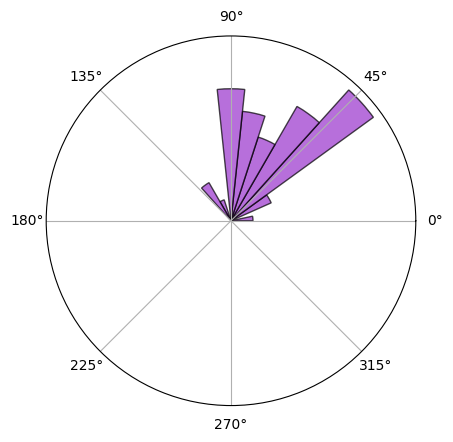

In [83]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Define number of bins for the histogram
num_bins = 30
bins = np.linspace(0, 2*np.pi, num_bins + 1)
# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2.0
width = 2 * np.pi / num_bins

# Compute histogram counts (frequency for each bin)
counts, _ = np.histogram(df_pca['pc1_angle'], bins=bins)

# Plot the histogram as bars on the polar plot
ax.bar(bin_centers, counts, width=width, align='center', alpha=0.7, fc=cmaps['LSD'](1.), ec='black')
ax.set_yticks([])
# ax.set_title('PC1 rotation')

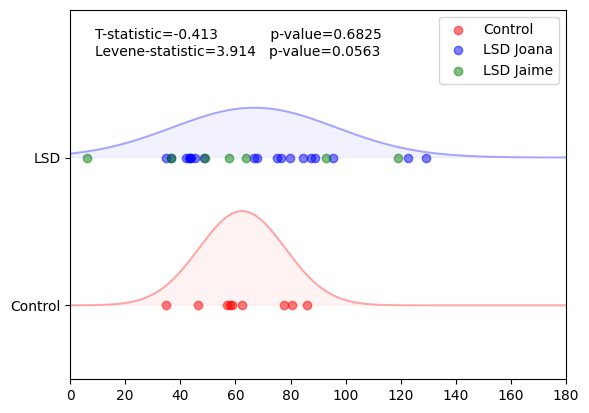

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_ind, levene

# Separate the data
df_true = df_pca[df_pca['Control_recording'] == True]['pc1_angle'].apply(np.degrees)
df_false = df_pca[df_pca['Control_recording'] == False]['pc1_angle'].apply(np.degrees)
df_false_colors = df_pca[df_pca['Control_recording'] == False]['color'].unique() # Get unique colors

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the control data
ax.scatter(df_true, [0]*len(df_true), color='red', label='Control', alpha=0.5)

# Plot the LSD data, creating separate scatter plots per unique color
for color in df_false_colors:
  df_color = df_false[df_pca['color'] == color]
  if color == 'b':
      ax.scatter(df_color, [1]*len(df_color), color=color, label=f'LSD Joana', alpha=0.5)
  if color == 'g':
      ax.scatter(df_color, [1]*len(df_color), color=color, label=f'LSD Jaime', alpha=0.5)

# Perform statistical tests
t_stat, p_val_t = ttest_ind(df_true, df_false, equal_var=True)
l_stat, p_val_l = levene(df_true, df_false)

# Display test results on plots
ax.text(0.05, 0.95,
        f"T-statistic={t_stat:.3f}            p-value={p_val_t:.4f}\nLevene-statistic={l_stat:.3f}   p-value={p_val_l:.4f}",
        ha='left', va='top', transform=ax.transAxes)

# Fit a normal distribution to the data and plot
x = np.linspace(0, 360, 1000)

mu_true, std_true = norm.fit(df_true)
pdf_true = norm.pdf(x, mu_true, std_true)
ax.plot(x, pdf_true * 25, color='red', alpha = 0.3) # Adjust heights by multiplying with a constant
ax.fill_between(x, pdf_true * 25, alpha=0.05, color='red')

mu_false, std_false = norm.fit(df_false)
pdf_false = norm.pdf(x, mu_false, std_false)
ax.plot(x, pdf_false * 25 + 1, color='blue', alpha = 0.3)  # Adjust heights by multiplying with a constant and adding 1
ax.fill_between(x, pdf_false * 25 + 1, 1, alpha=0.05, color='blue')

# Configure y-axis
ax.set_yticks([0, 1])
ax.set_yticklabels(['Control', 'LSD'])
ax.set_ylim([-0.5, 2])

# Configure x-axis
ax.set_xlim([0, 180])

# Add a legend
ax.legend()

plt.show()

(array([1., 0., 3., 5., 3., 3., 4., 1., 0., 3.]),
 array([  6.10622088,  18.40197361,  30.69772634,  42.99347906,
         55.28923179,  67.58498451,  79.88073724,  92.17648997,
        104.47224269, 116.76799542, 129.06374814]),
 <BarContainer object of 10 artists>)

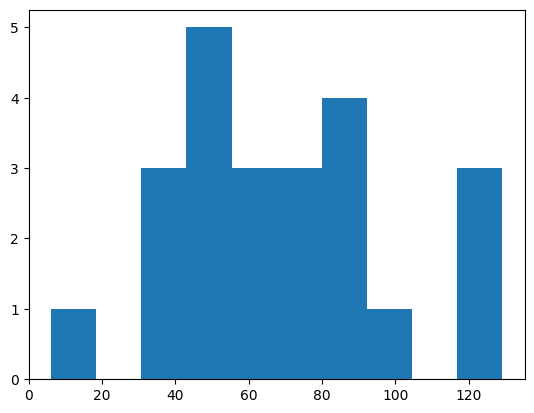

In [27]:
fig, ax = plt.subplots()
ax.hist(np.degrees(df_pca['pc1_angle']))